# Airbnb Travel Data Analysis

<img src="https://pluspng.com/img-png/airbnb-logo-png-airbnb-logo-1600.png" alt="image not found" style="width:200px;height:150px;">

### About Airbnb Company-
Airbnb, Inc. is an American San Francisco-based company operating an online marketplace for short- and long-term homestays and experiences. <br>
The company acts as a broker and charges a commission from each booking.

### Problem Statement:
Travel industries are having important reflection of the economy from past few decades, and Airbnb housing price ranges are of great interest for both Hosts and Traveler. In this project, we are analyzing the Airbnb dataset to uncover various aspects. It helps in not only understanding the meaningful relationships between attributes but it also allows us to do our own research and come-up with our findings.<br>
Since 2008, guests and hosts have used AirBNB to expand on travelling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in San Diego, California for 2019.
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.
### Objectives: 
The objective of this project is 
1. Initial Data Exploration.
2. Data cleaning & Feature Engineering.
3. Data Visualization & Exploratory Data Analysis<br>
At the end we aim to genrate various meaningfull insights and conclusions from the data to uncover hidden aspects

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
data = pd.read_csv("airbnb prices.csv")
df = data.copy()
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


## 1- Initial Data Exploration

In [3]:
df.shape

(18723, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

In [5]:
df.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.872300e+04,18723.0,1.872300e+04,0.0,0.0,18723.000000,18723.000000,18723.000000,18723.000000,0.0,18723.000000,0.0,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,NaN,NaN,16.741548,3.301127,2.922021,1.430380,NaN,166.599477,NaN,52.365261,4.888585
std,6.082192e+06,0.0,3.758103e+07,NaN,NaN,33.522630,2.213558,1.327524,0.879019,NaN,108.943849,NaN,0.015142,0.034537
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.050608e+06,1476.0,7.140879e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355254,4.864344
50%,1.228287e+07,1476.0,1.988641e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364628,4.885994
75%,1.661084e+07,1476.0,5.202680e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374797,4.907480
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


In [6]:
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

## 2- Data cleaning & Feature Engineering

### Column: host_id               

In [7]:
df['host_id'].isnull().sum()

0

#### Conclusion: host_id has no null values

### Column: room_type             

In [8]:
df['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

In [9]:
df['room_type'].isnull().sum()

0

#### Coclusion: 
room_type has no missing values.<br>
There are 3 different categories: Shared room, Entire home/apt, Private room.

### Column: City

In [10]:
df['city'].unique()

array(['Amsterdam'], dtype=object)

In [11]:
df['city'].isnull().sum()

0

#### Conclusion: city has no null values and all belong Amsterdam

### Column: borough               

In [12]:
#all the values are missing, we can drop this column
df.drop('borough',axis=1,inplace=True)

### Column: neighborhood

In [13]:
df['neighborhood'].unique()

array(['De Pijp / Rivierenbuurt', 'Centrum West', 'Watergraafsmeer',
       'De Baarsjes / Oud West', 'Oostelijk Havengebied / Indische Buurt',
       'Westerpark', 'Oud Oost', 'Centrum Oost',
       'Geuzenveld / Slotermeer', 'Buitenveldert / Zuidas', 'Oud Noord',
       'Bos en Lommer', 'Slotervaart', 'Bijlmer Centrum',
       'Ijburg / Eiland Zeeburg', 'Noord-West / Noord-Midden',
       'De Aker / Nieuw Sloten', 'Noord West', 'Bijlmer Oost', 'Osdorp',
       'Noord Oost', 'Gaasperdam / Driemond', 'Westpoort'], dtype=object)

In [14]:
df['neighborhood'].isnull().sum()

0

In [15]:
df['neighborhood'].value_counts()

De Baarsjes / Oud West                    3289
De Pijp / Rivierenbuurt                   2378
Centrum West                              2225
Centrum Oost                              1730
Westerpark                                1430
Noord-West / Noord-Midden                 1418
Oud Oost                                  1169
Bos en Lommer                              988
Oostelijk Havengebied / Indische Buurt     921
Watergraafsmeer                            517
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    378
Slotervaart                                349
Buitenveldert / Zuidas                     250
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97
Gaasperdam / 

### Column: reviews

In [16]:
df['reviews'].unique()

array([  7,  45,   1, 184,  67,   2,   0,  26,  10,  15,   3,  11,   6,
        73,  60,   9,   4,  12,  30,  19,  23,  17,  25,   8,  21,  13,
        62,  16,  18,  80,  59,   5,  32,  28,  29,  57,  33, 278,  48,
        37,  41, 195,  24,  22,  27,  91,  14,  71,  34,  36,  20,  35,
        55, 124,  58,  87,  31,  44, 133, 136, 112,  95,  68, 103,  43,
        69, 105,  56,  63,  49,  52, 111,  47,  50,  38,  61, 102,  46,
       127, 108,  54,  76,  72,  66,  53, 167,  51, 190,  40, 284,  98,
        99, 101,  42,  39,  75,  97, 106,  64,  82,  78,  86,  96,  65,
        79,  77,  92, 100,  81,  85, 162,  88,  84, 447, 135, 144, 121,
       122, 129, 116, 149, 120, 153,  70, 151, 232, 150, 110, 228, 114,
       138, 113,  90, 119, 107, 125, 175, 104, 164,  83, 178, 140, 126,
       410, 132, 165, 254, 115, 128, 354, 369, 117, 147, 109,  74, 209,
       196,  89, 213,  94, 154, 159, 123, 146, 137, 177, 242, 130, 532,
        93, 187, 131, 141, 321, 142, 200, 268, 168, 225, 199, 15

In [17]:
df['reviews'].isnull().sum()

0

#### Conclusion: reviews has no missing values 

### Column: overall_satisfaction

In [18]:
df['overall_satisfaction'].unique()

array([4.5, 0. , 5. , 4. , 1.5, 3.5, 2.5, 3. , 1. ])

In [19]:
df['overall_satisfaction'].isnull().sum()

0

In [20]:
df['overall_satisfaction'].value_counts()

5.0    7708
0.0    5748
4.5    4559
4.0     577
3.5     109
3.0      19
1.5       1
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

#### Conclusion: overall_satisfaction has no missing values

### Column: accommodates

In [21]:
df['accommodates'].unique()

array([ 2,  4,  3, 16, 12,  1,  8,  6,  5, 10,  7, 14, 11,  9, 13, 17],
      dtype=int64)

In [22]:
df['accommodates'].isnull().sum()

0

### Column: name

In [23]:
df['name'].isnull().sum()

52

In [24]:
df['name'].value_counts()

Amsterdam                                             36
Lovely apartment near Vondelpark                      10
Magnificent panoramic city view                        8
Beautiful apartment in Amsterdam                       8
Cosy apartment in Amsterdam                            8
                                                      ..
Bright and trendy apt, sunny balcony -De Pijp, RAI     1
Bright & Cozy Apartment in the Pijp                    1
NEW! Monumental Apartment In The Heart of the City     1
A great apartment in Amsterdam’s vibrant ‘de Pijp’     1
I have a room available for rent                       1
Name: name, Length: 18150, dtype: int64

In [25]:
#there are 2 missing values, we can drop it
df.dropna(subset='name',inplace=True)

### Column: last_modified

In [26]:
df['last_modified'].dtype

dtype('O')

In [27]:
#changing datatype of last modified to datetime
df['last_modified'] = pd.to_datetime(df['last_modified'])

In [28]:
# making new columns according to day,month,year
df['last_modified_day'] = df['last_modified'].dt.day
df['last_modified_month']= df['last_modified'].dt.month
df['last_modified_year']= df['last_modified'].dt.year

In [29]:
df.drop(['last_modified'],axis= 1,inplace= True)

### Column: Country

In [30]:
df['country'].isnull().sum()

18671

In [31]:
df['country'].fillna('Netherlands',inplace=True)

### Column: survey_id, bathrooms, minstay                                         

In [32]:
df['survey_id'].unique()

array([1476], dtype=int64)

In [33]:
df.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                     0
city                        0
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18671
price                       0
minstay                 18671
name                        0
latitude                    0
longitude                   0
location                    0
last_modified_day           0
last_modified_month         0
last_modified_year          0
dtype: int64

In [34]:
#dropping these columns as either they have whole column with missing  values or it have not much use in analysis
df.drop(['survey_id','bathrooms','minstay'],axis= 1,inplace= True)

In [35]:
df.shape

(18671, 18)

### Checking duplicate records

In [36]:
df.duplicated().value_counts()

False    18671
dtype: int64

#### Conclusion: No duplicated records found

## Exporting Clean Data

In [37]:
df.to_csv('airbnb_cleaned_data.csv',index=False)

## Exploring Some more Data

In [38]:
df_cleaned = pd.read_csv('airbnb_cleaned_data.csv')
df_cleaned.head()

,room_id,host_id,room_type,country,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude,location,last_modified_day,last_modified_month,last_modified_year
0,10176931,49180562,Shared room,Netherlands,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...,23,7,2017
1,8935871,46718394,Shared room,Netherlands,Amsterdam,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...,23,7,2017
2,14011697,10346595,Shared room,Netherlands,Amsterdam,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...,23,7,2017
3,6137978,8685430,Shared room,Netherlands,Amsterdam,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...,23,7,2017
4,18630616,70191803,Shared room,Netherlands,Amsterdam,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...,23,7,2017


In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18671 entries, 0 to 18670
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18671 non-null  int64  
 1   host_id               18671 non-null  int64  
 2   room_type             18671 non-null  object 
 3   country               18671 non-null  object 
 4   city                  18671 non-null  object 
 5   neighborhood          18671 non-null  object 
 6   reviews               18671 non-null  int64  
 7   overall_satisfaction  18671 non-null  float64
 8   accommodates          18671 non-null  int64  
 9   bedrooms              18671 non-null  float64
 10  price                 18671 non-null  float64
 11  name                  18671 non-null  object 
 12  latitude              18671 non-null  float64
 13  longitude             18671 non-null  float64
 14  location              18671 non-null  object 
 15  last_modified_day  

In [40]:
# descriptive summary of data
df_cleaned.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,last_modified_day,last_modified_month,last_modified_year
count,1.867100e+04,1.867100e+04,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.0,18671.0
mean,1.121039e+07,3.579266e+07,16.757217,3.302956,2.922875,1.430989,166.637781,52.365259,4.888602,22.268759,7.0,2017.0
std,6.087346e+06,3.761330e+07,33.529599,2.212851,1.327896,0.879232,108.975964,0.015150,0.034552,0.443326,0.0,0.0
min,2.818000e+03,2.234000e+03,0.000000,0.000000,1.000000,0.000000,12.000000,52.296200,4.763264,22.000000,7.0,2017.0
25%,6.046700e+06,7.126212e+06,2.000000,0.000000,2.000000,1.000000,108.000000,52.355253,4.864383,22.000000,7.0,2017.0
50%,1.229698e+07,1.988443e+07,6.000000,4.500000,2.000000,1.000000,144.000000,52.364623,4.886012,22.000000,7.0,2017.0
75%,1.662442e+07,5.203313e+07,17.000000,5.000000,4.000000,2.000000,192.000000,52.374799,4.907499,23.000000,7.0,2017.0
max,2.000373e+07,1.418319e+08,532.000000,5.000000,17.000000,10.000000,6000.000000,52.424980,5.027689,23.000000,7.0,2017.0


# 3- Data Visualization & Exploratory Data Analysis

## >> Top 5 Earners w.r.t Host_id?

In [41]:
earners = df_cleaned.groupby(['host_id'])['price'].sum().sort_values(ascending=False).to_frame().head(5)
earners

,price
host_id,
48703385,29493.0
1464510,11397.0
8558897,11300.0
113977564,10098.0
517215,9143.0


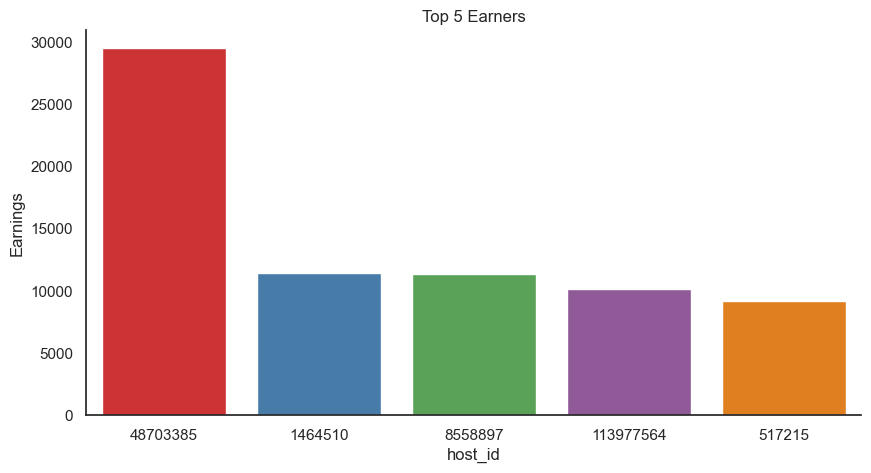

In [42]:
sns.set_style('white')
plt.figure(figsize=(10,5))
plt.title('Top 5 Earners')
sns.barplot(x=earners.index.astype(str),y= earners['price'],palette='Set1')
plt.ylabel('Earnings')
sns.despine()

### Insights:
1. Hosts with ID 48703385, 48703385, 8558897, 113977564, 517215 are the top 5 earners.<br>
2. Host 48703385 is the top performer who earned more than 29000.

##  >> Which Room Types are booked more?

In [43]:
#calculating percentage for each room type
roomtype_perc = (df_cleaned.room_type.value_counts(normalize=True)*100).to_frame()
roomtype_perc

,room_type
Entire home/apt,80.001071
Private room,19.661507
Shared room,0.337422


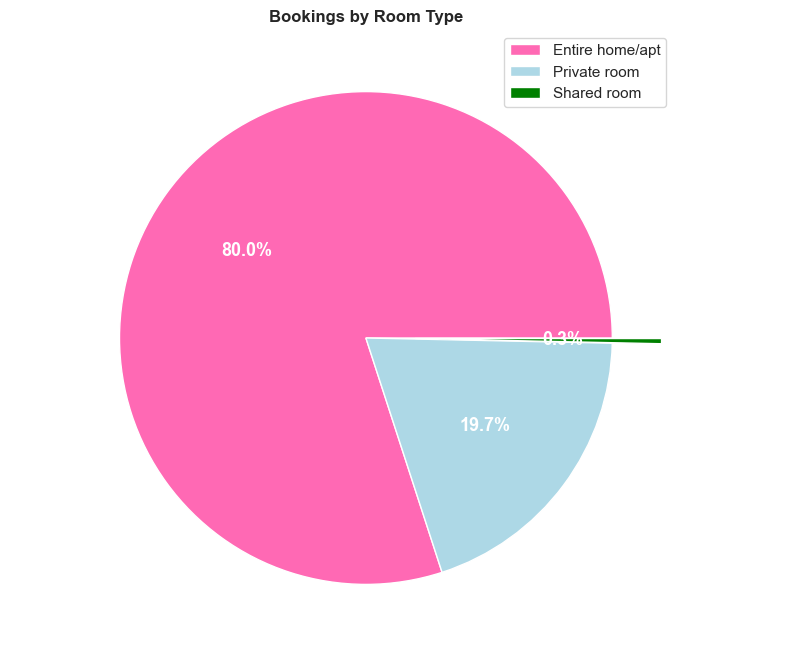

In [44]:
plt.figure(figsize=(8,8))
plt.pie(roomtype_perc['room_type'],
       labels=roomtype_perc.index,
       autopct="%.1f%%",
       colors = ['hotpink','lightblue','green'],
       textprops = {'size':'13','fontweight':'bold','color':'w'},
       explode=[0,0,0.2])
plt.title('Bookings by Room Type',fontdict={'fontweight':'bold'})
plt.legend(loc='upper right')
plt.show()

### Insights:
Above Pie Chart Shows
1. Entire Home/Apt are mostly booked, it cover 80% of the area.<br>
2. Secondaly Private rooms are booked by more than 19%.<br>
However Shared rooms are less booked or less prefered by cutomers.


## >> Any particular location getting maximum number of bookings?

In [45]:
neighbours = df_cleaned.neighborhood.value_counts().to_frame()
neighbours

,neighborhood
De Baarsjes / Oud West,3276
De Pijp / Rivierenbuurt,2371
Centrum West,2216
Centrum Oost,1727
Westerpark,1428
Noord-West / Noord-Midden,1415
Oud Oost,1166
Bos en Lommer,983
Oostelijk Havengebied / Indische Buurt,920
Watergraafsmeer,514


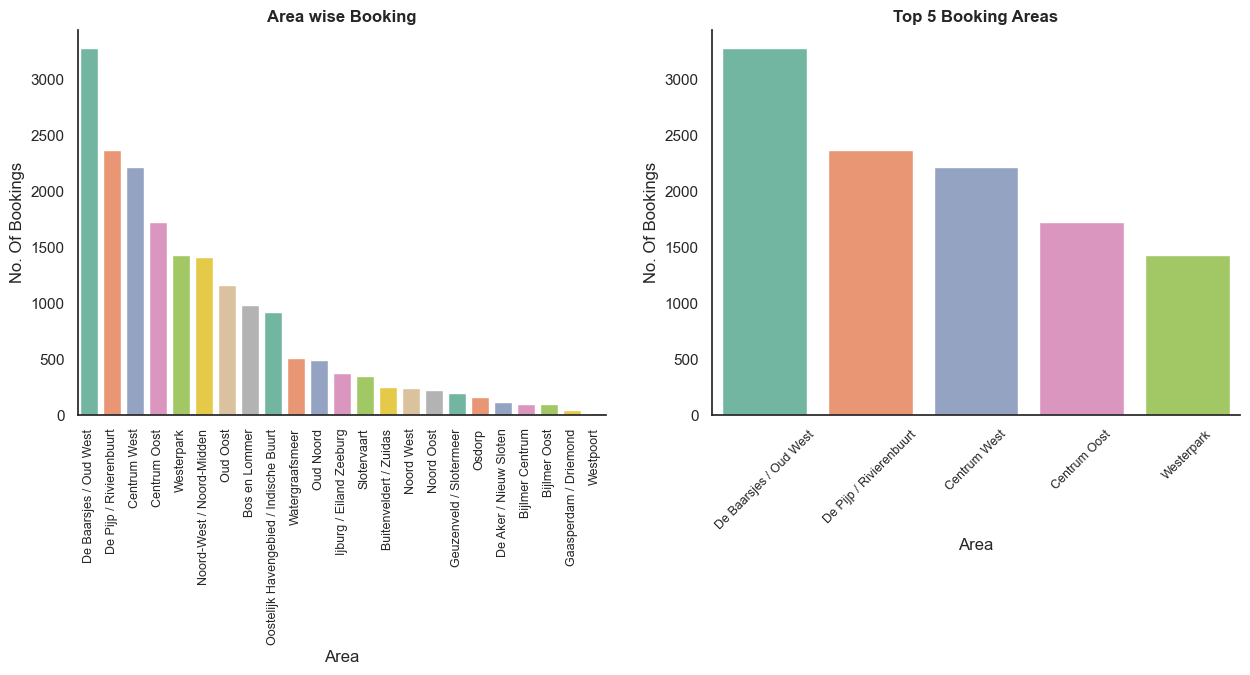

In [46]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
plt.title('Area wise Booking',fontdict={'fontweight':'bold'})
sns.barplot(x=neighbours.index,y=neighbours['neighborhood'].values,palette='Set2')
plt.xlabel('Area')
plt.ylabel('No. Of Bookings')
plt.xticks(rotation=90,fontsize=9)
sns.despine()
plt.subplot(122)
plt.title('Top 5 Booking Areas',fontdict={'fontweight':'bold'})
sns.barplot(x=neighbours['neighborhood'].head().index,y=neighbours['neighborhood'].head().values,palette='Set2')
plt.xlabel('Area')
plt.ylabel('No. Of Bookings')
plt.xticks(rotation=45,fontsize=9)
sns.despine()
plt.show()

### Insights:
Above Figures Shows that-<br>
De Baarsjes/Oud West, De Pijp/Rivierenbuurt, Centrum West, Centrum Oost, Westerpark	are the top 5 booking and visiting areas.

## >> Which Room Type is more liked according to reviews?

In [47]:
room_liked= df_cleaned.groupby(['room_type','overall_satisfaction'])['reviews'].sum().sort_values(ascending=False).reset_index()
room_liked

,room_type,overall_satisfaction,reviews
0,Entire home/apt,5.0,105211
1,Private room,5.0,70702
2,Entire home/apt,4.5,63967
3,Private room,4.5,57189
4,Entire home/apt,4.0,4934
5,Private room,4.0,4667
6,Entire home/apt,0.0,3371
7,Shared room,4.5,826
8,Private room,0.0,621
9,Entire home/apt,3.5,416


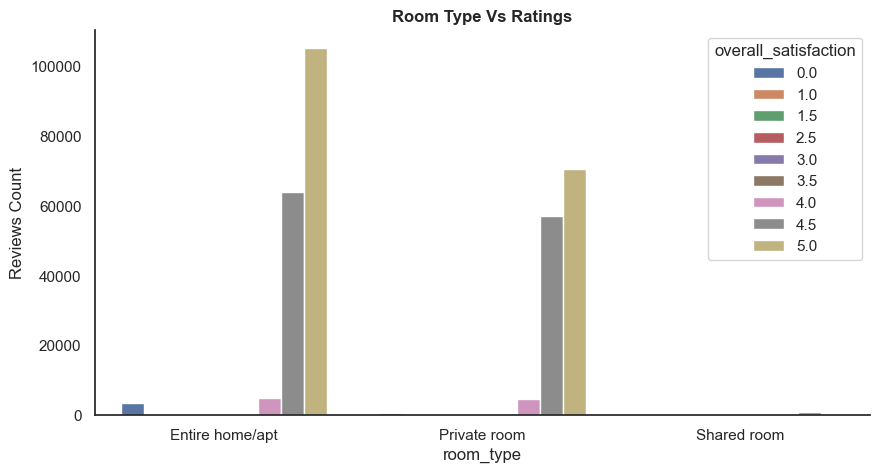

In [48]:
plt.figure(figsize=(10,5))
plt.title('Room Type Vs Ratings',fontdict={'fontweight':'bold'})
sns.barplot(x=room_liked['room_type'],y=room_liked['reviews'],hue=room_liked['overall_satisfaction'])
plt.ylabel('Reviews Count')
sns.despine()
plt.show()

### Insights:
1. Entire home/apt are mostly liked and got ratings between 4 to 5.
2. Private room	are also liked and got ratings between 4 to 5.
3. Shared room are not booked more and yet has less count of rating but it still got ratings between 4 to 5. 

## >>  Which Neighborhood mostly liked by visiters?

In [49]:
liked_neighbours = df_cleaned.groupby(['neighborhood','overall_satisfaction'])['reviews'].sum().sort_values(ascending=False).to_frame().reset_index()
new = liked_neighbours[liked_neighbours['reviews']>1000]
new

,neighborhood,overall_satisfaction,reviews
0,Centrum West,5.0,30982
1,De Baarsjes / Oud West,5.0,29365
2,Centrum Oost,5.0,22954
3,De Baarsjes / Oud West,4.5,20980
4,De Pijp / Rivierenbuurt,5.0,19166
5,Centrum West,4.5,19040
6,De Pijp / Rivierenbuurt,4.5,14529
7,Westerpark,5.0,13854
8,Centrum Oost,4.5,12949
9,Noord-West / Noord-Midden,5.0,10847


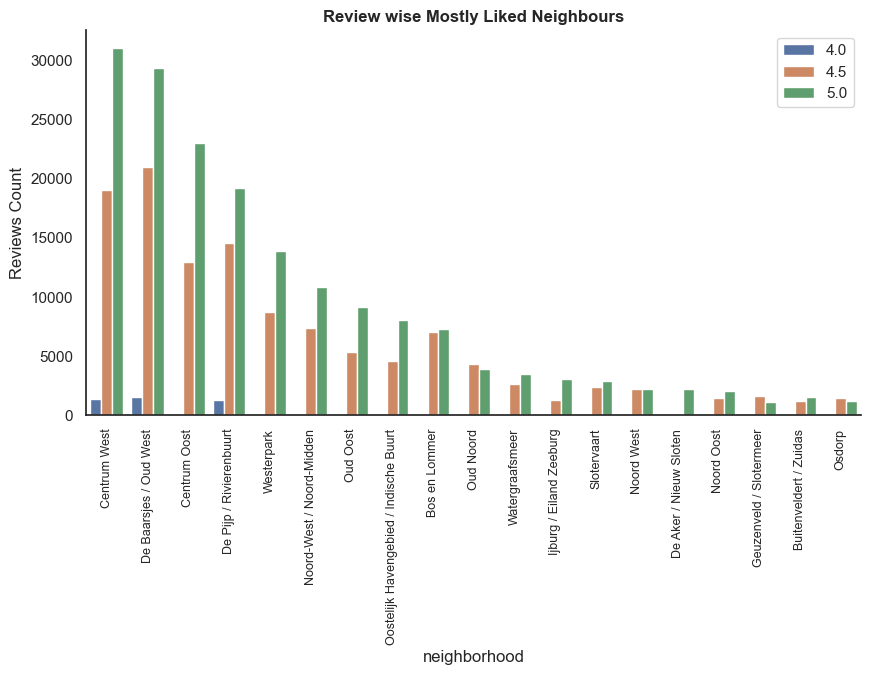

In [50]:
plt.figure(figsize=(10,5))
plt.title('Review wise Mostly Liked Neighbours',fontdict={'fontweight':'bold'})
sns.barplot(x=new['neighborhood'],y=new['reviews'],hue=new['overall_satisfaction'])
plt.ylabel('Reviews Count')
plt.xticks(rotation=90,fontsize=9)
plt.legend(loc='upper right')
sns.despine()
plt.show()

### Insights:
Centrum West, De Baarsjes/Oud West, Centrum Oost are mostly liked neighborhoods.

## >> Top 10 earnings Neighborhood?

In [51]:
earnings = df_cleaned.groupby(['neighborhood'])['price'].sum().sort_values(ascending=False).reset_index()
earnings = earnings.head(10)
earnings

,neighborhood,price
0,De Baarsjes / Oud West,520871.0
1,Centrum West,462172.0
2,De Pijp / Rivierenbuurt,399088.0
3,Centrum Oost,347477.0
4,Noord-West / Noord-Midden,258519.0
5,Westerpark,233909.0
6,Oud Oost,176919.0
7,Oostelijk Havengebied / Indische Buurt,132530.0
8,Bos en Lommer,126647.0
9,Watergraafsmeer,79386.0


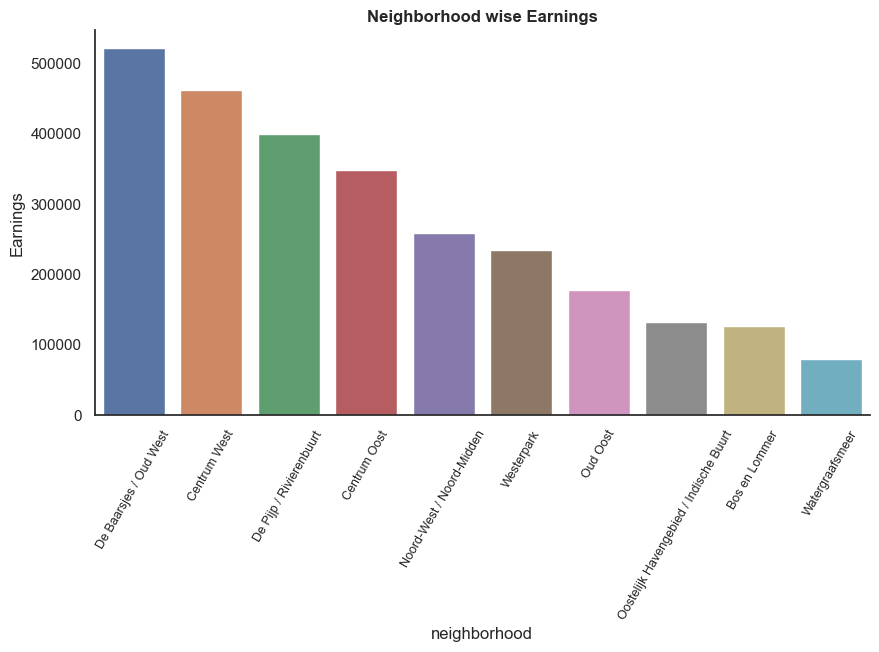

In [52]:
plt.figure(figsize=(10,5))
plt.title('Neighborhood wise Earnings',fontdict={'fontweight':'bold'})
sns.barplot(x=earnings['neighborhood'],y=earnings['price'])
plt.ylabel('Earnings')
plt.xticks(rotation=60,fontsize=9)
sns.despine()
plt.show()

### Insights:
Above Figure shows-<br>
De Baarsjes / Oud West, Centrum West, De Pijp / Rivierenbuurt, Centrum Oost, Noord-West / Noord-Midden, Westerpark, Oud Oos,
Oostelijk Havengebied / Indische Buurt, Bos en Lommer, Watergraafsmeer are the top earning areas.

## >> Neighborhood vs Price-

In [53]:
price_neighbor=df_cleaned.groupby(['neighborhood'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
price_neighbor=price_neighbor.round(decimals=2)
price_neighbor

,neighborhood,price
5,Centrum West,208.56
4,Centrum Oost,201.20
14,Noord-West / Noord-Midden,182.70
11,Ijburg / Eiland Zeeburg,175.87
8,De Pijp / Rivierenbuurt,168.32
21,Westerpark,163.80
7,De Baarsjes / Oud West,159.00
17,Oud Noord,156.98
20,Watergraafsmeer,154.45
18,Oud Oost,151.73


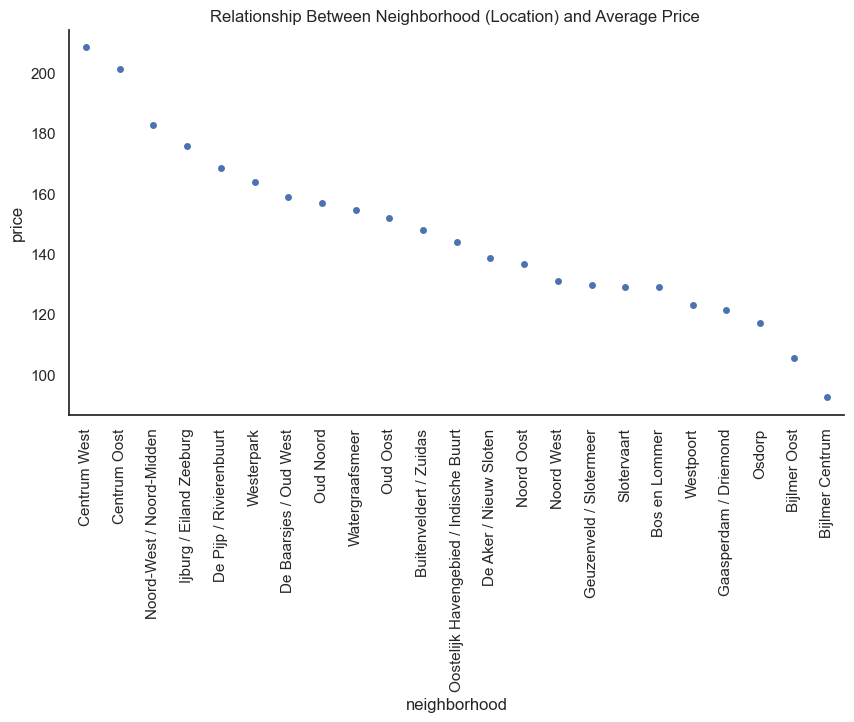

In [54]:
plt.figure(figsize=(10,5))
sns.stripplot(x='neighborhood',y='price',data=price_neighbor)
plt.xticks(rotation=90)
plt.title("Relationship Between Neighborhood (Location) and Average Price ")
sns.despine()
plt.show()

### Insights:
1. Centrum West has a highest average price 208.31
2. Centrum Oost has a 2nd highest average price 201.22
3. Noord-West / Noord-Midden has a 3rd highest average price 182.73

## >> Accommodates Vs Price-

In [55]:
acc_price = df_cleaned.groupby(['accommodates'])['price'].sum().sort_values(ascending=False).reset_index()
acc_price

,accommodates,price
0,2,1316356.0
1,4,1173803.0
2,3,238840.0
3,6,143423.0
4,5,113492.0
5,8,42750.0
6,1,28958.0
7,7,16333.0
8,16,14914.0
9,10,8839.0


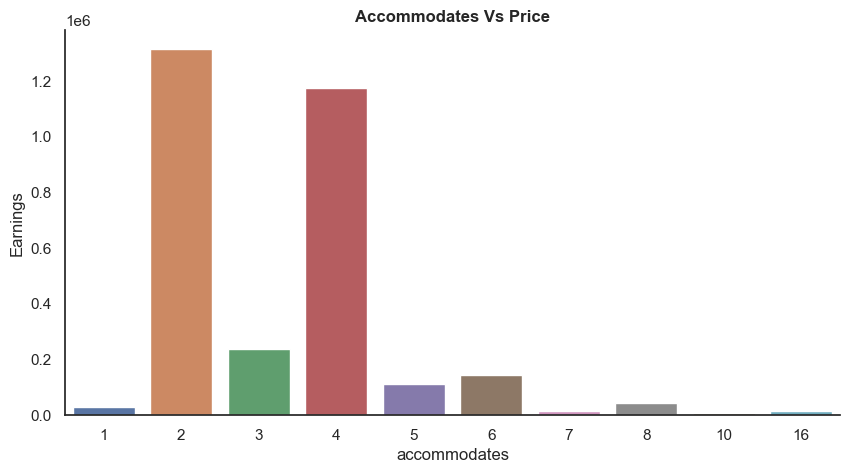

In [56]:
plt.figure(figsize=(10,5))
plt.title('Accommodates Vs Price',fontdict={'fontweight':'bold'})
sns.barplot(x=acc_price['accommodates'].head(10),y=acc_price['price'].head(10))
plt.ylabel('Earnings')
sns.despine()
plt.show()

### Insights:
1. Visiters who got 2 or 4 Accommodates leads to most of the earnings.
2. Secondaly visiters who got 3, 6, 5 Accommodates also helps in earning or profit.

## >> Top 10 earners name w.r.t price?

In [57]:
name_price = df_cleaned.groupby(['name'])['price'].sum().sort_values(ascending=False).reset_index()
name_price

,name,price
0,"Zonnige woonboot,centraal en rustig",6000.0
1,Amsterdam,4936.0
2,One public bedroom,3770.0
3,Spacious family house with garden,2303.0
4,AmsterdamBase,1920.0
...,...,...
18145,Minimalist White Room,23.0
18146,Cozy Studio,22.0
18147,Nice room in de Pijp,21.0
18148,Relax 9 hours!,18.0


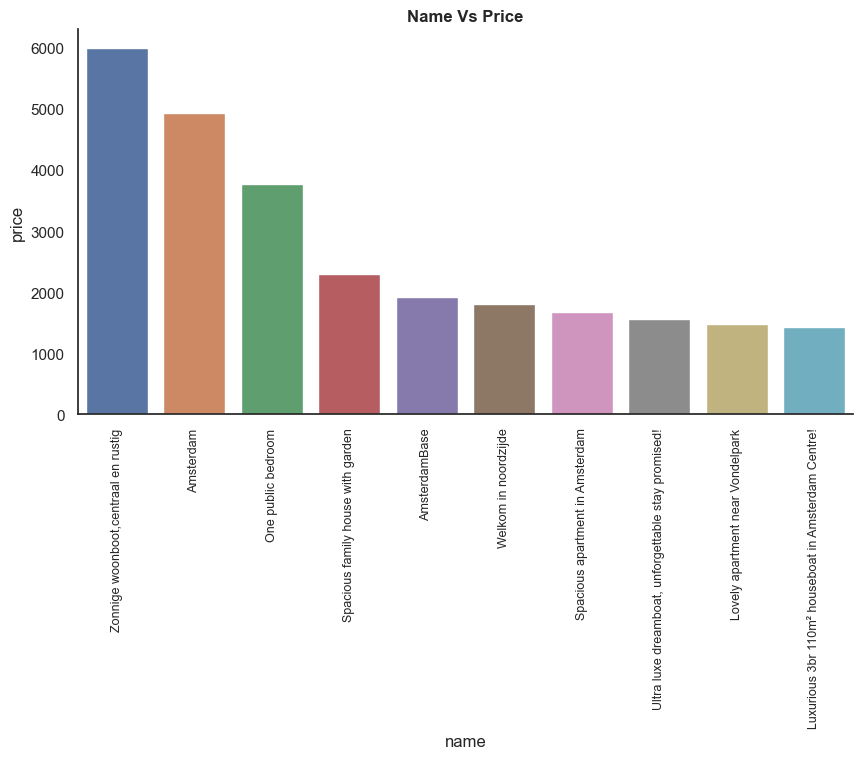

In [58]:
plt.figure(figsize=(10,5))
plt.title('Name Vs Price',fontdict={'fontweight':'bold'})
sns.barplot(x=name_price['name'].head(10),y=name_price['price'].head(10))
plt.ylabel('price')
plt.xticks(rotation=90,fontsize=9)
sns.despine()
plt.show()

### Insights:
Above figure shows that these are the top earning names in which Zonnige woonboot,centraal en rustig earned most.

## >> Overall Satisfaction Vs Price-
In our dataset we don't have quality feature, so we will consider a quality as a overall_satisfaction rating given by the customers. Now we can say relationship between overall_satisfaction and price.

In [59]:
sat_price = df_cleaned.groupby(['price'])['overall_satisfaction'].mean().sort_values(ascending=False).reset_index()
sat_price

,price,overall_satisfaction
0,12.0,5.0
1,502.0,5.0
2,737.0,5.0
3,721.0,5.0
4,313.0,5.0
...,...,...
418,600.0,0.0
419,612.0,0.0
420,83.0,0.0
421,659.0,0.0


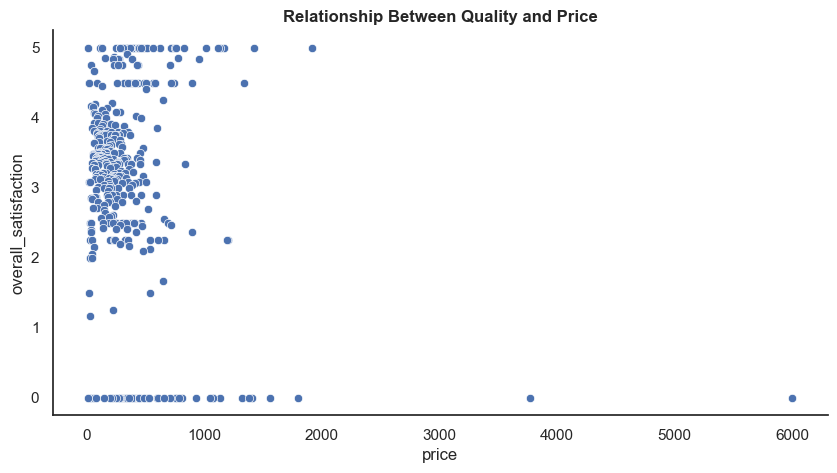

In [60]:
plt.figure(figsize=(10,5))
plt.title('Relationship Between Quality and Price',fontdict={'fontweight':'bold'})
sns.scatterplot(x=sat_price['price'],y=sat_price['overall_satisfaction'])
sns.despine()
plt.show()

### Insighst:
In the above scatterplot plot we can see that if the 'price' is higher than the 'overall_satisfaction(quality)' is less and where the 'price' is less than the 'overall_satisfaction(quality)' is high. For example: price=313 then the overaoverall_satisfaction(quality) is 5.0 and in other side price=6000 then the overall_satisfaction(quality) is 0.0

<Axes: >

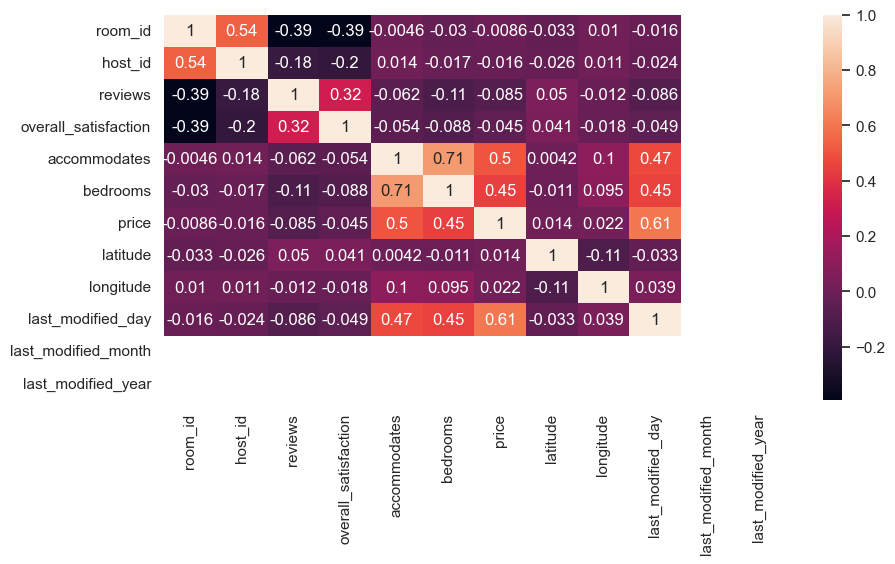

In [61]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df_cleaned.corr(),annot=True)

## >> Cheapest Airbnb property in Amsterdam-

In [62]:
Cheap_airbnb=df_cleaned.groupby(['name'])['price'].mean().reset_index().sort_values(by='price',ascending=True)
Cheap_airbnb=Cheap_airbnb[0:10]
Cheap_airbnb

,name,price
14119,"SORRY, NO TOURISTS ALLOWED - Kattenoppas gezocht",12.0
13605,Relax 9 hours!,18.0
12496,Nice room in de Pijp,21.0
6196,Cozy Studio,22.0
11144,Minimalist White Room,23.0
4575,Cheap and cosy room Amsterdam,24.0
13704,"Rent a Tent, Cheap and Fun stay in Amsterdam!",24.0
118,1 room next to Ziggo Dome,24.0
13895,Room Overtoom Amsterdam Centre,24.0
11319,"Modern Room by Arena, ZIGGO, HmH",24.0


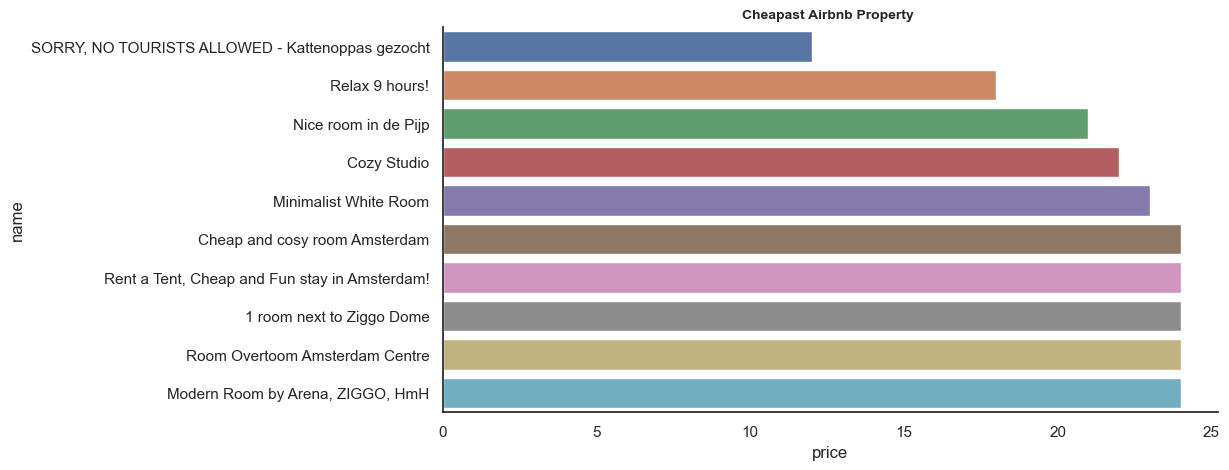

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x='price',y='name',data=Cheap_airbnb)
plt.title("Cheapast Airbnb Property ",fontweight='bold',fontsize=10)
sns.despine()
plt.show()

### Insights:
From the above barchart we see 10 cheapest properties in which the 'Kattenoppas gezocht' is the cheapest property with the price of $12

## >> Expensive Airbnb property in Amsterdam-

In [64]:
expe_airbnb=df_cleaned.groupby(['name'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
expe_airbnb=expe_airbnb[0:10]
expe_airbnb

,name,price
17548,"Zonnige woonboot,centraal en rustig",6000.0
12640,One public bedroom,3770.0
1268,AmsterdamBase,1920.0
17317,Welkom in noordzijde,1799.0
16853,"Ultra luxe dreamboat, unforgettable stay promi...",1558.0
10630,Luxurious 3br 110m² houseboat in Amsterdam Cen...,1428.0
17369,Whole house 200m2 Frankendael Park,1412.0
2882,"Bellevue apartment, 2 bedrooms, sleeps 6",1386.0
2476,Beautiful canalhouse for couples near Leidse p...,1343.0
13427,Pure luxe in Amsterdam old south,1319.0


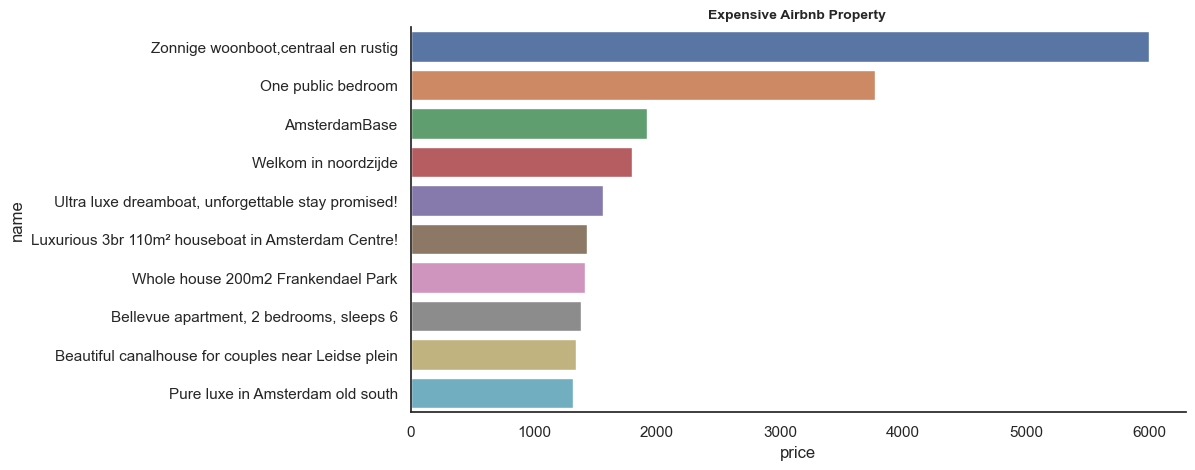

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x='price',y='name',data=expe_airbnb)
plt.title("Expensive Airbnb Property ",fontweight='bold',fontsize=10)
sns.despine()
plt.show()

### Insights:
From the above barchart we see 10 expensive propertys in which the 'Zonnige woonboot,centraal en rustig' is the expensive property with the price of $6000